In [35]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 5.6 MB/s eta 0:00:23
   ---------------------------------------- 1.3/124.9 MB 4.5 MB/s eta 0:00:28
    --------------------------------------- 1.8/124.9 MB 3.6 MB/s eta 0:00:35
    --------------------------------------- 2.4/124.9 MB 3.5 MB/s eta 0:00:35
   - -------------------------------------- 3.1/124.9 MB 3.3 MB/s eta 0:00:37
   - -------------------------------------- 3.7/124.9 MB 3.2 MB/s eta 0:00:39
   - -------------------------------------- 4.2/124.9 MB 3.2 MB/s eta 0:00:38
   - -------------------------------------- 4.5/124.9 MB 2.8 MB/s eta 0:00:43
   - -------------------------------------- 5.5/124.9 MB 3.0 MB/s eta 0:00:40
   -- ------------------------------------- 6.3/124.9 MB 3.2 MB/s eta 0:00:38
   -- ------------------------------------- 7.3/124.9 MB 3.3 MB/s eta 0:00:36
   -- ------------------------------------- 8.1/124.9 MB 3.3 MB/s eta 0

1. Import Necessary Libraries


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn. linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


2. Load and Read Data

In [3]:
data=pd.read_csv(r"C:\Users\lenovo\Downloads\Churn_Modelling.csv")
data.head()
data.info()
data.describe()
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age

In [4]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

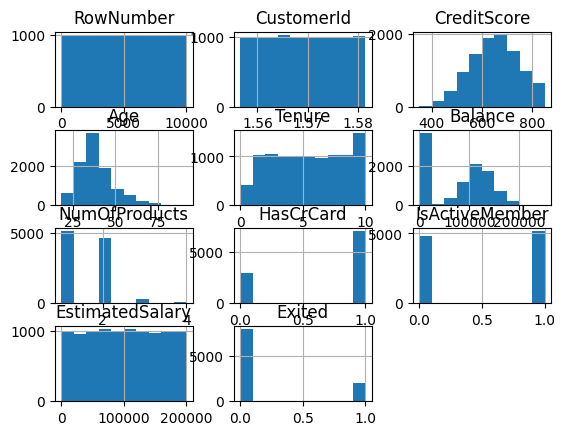

In [5]:
data.hist()
plt.show()

3. Data Preprocessing

In [6]:
#preprocessing
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
#encoding
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

#scaling
X = data.drop('Exited', axis=1)
y = data['Exited']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


4. Correlation & Feature Importance

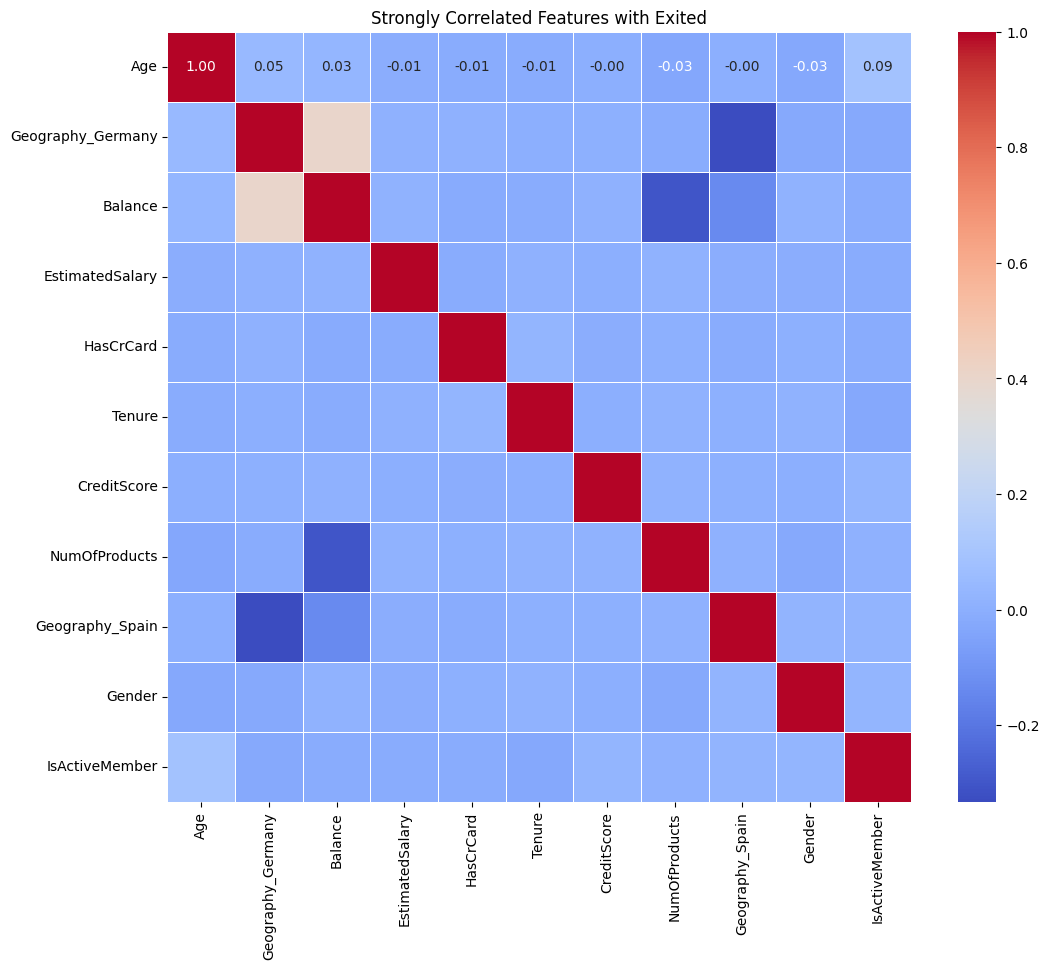

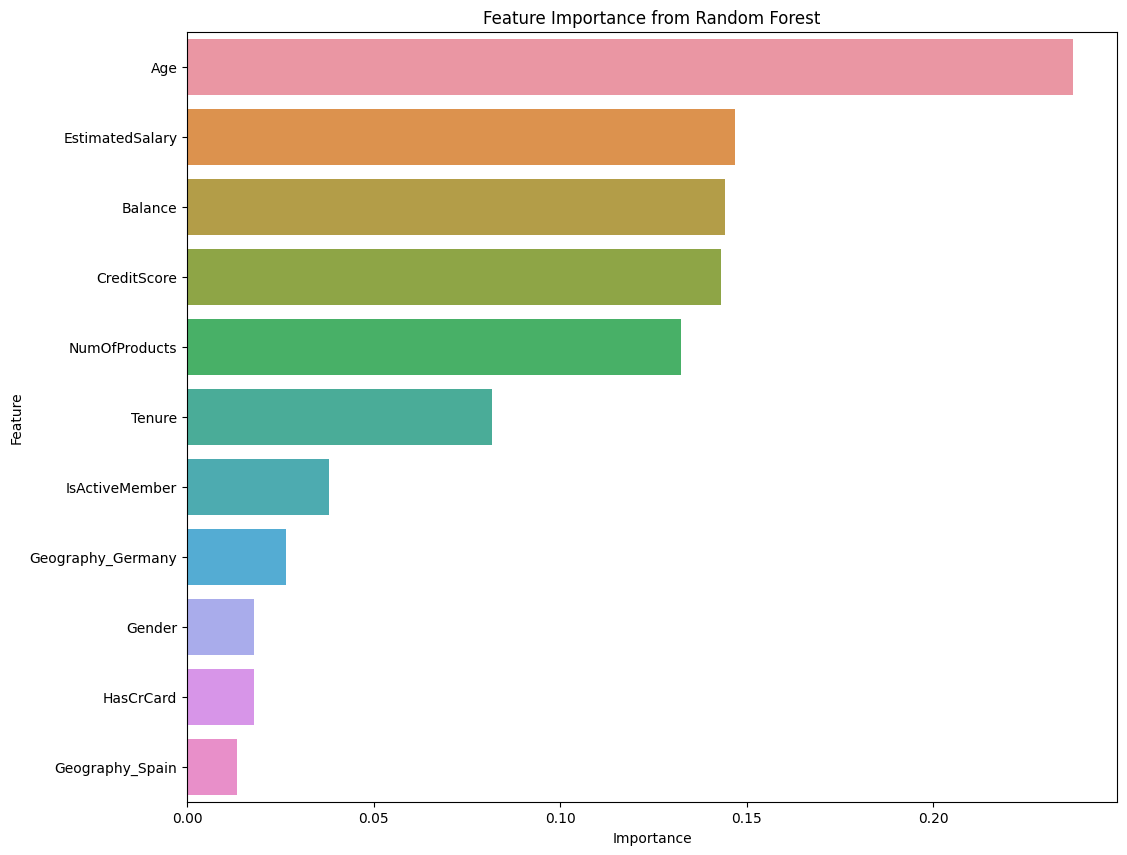

Top Important Features Used for Modeling:
['Age', 'EstimatedSalary', 'Balance', 'CreditScore', 'NumOfProducts', 'Tenure', 'IsActiveMember', 'Geography_Germany', 'Gender', 'HasCrCard']


In [ ]:

corr_matrix = data.corr()

churn_corr = corr_matrix['Exited'].sort_values(ascending=False)


strong_corr_features = churn_corr[abs(churn_corr) > 0].index.tolist()
strong_corr_features.remove('Exited')  # remove the target itself


X_fin = data[strong_corr_features]
y = data['Exited']


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_fin, y)

importances = pd.Series(model.feature_importances_, index=X_fin.columns).sort_values(ascending=False)
imp_df = pd.DataFrame({"Feature": importances.index, "Importance": importances.values})

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[strong_corr_features, strong_corr_features], 
            annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Strongly Correlated Features with Exited")
plt.show()

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


top_features = importances.index[:10].tolist()
X_fin = X_fin[top_features]

print("Top Important Features Used for Modeling:")
print(X_fin.columns.tolist())


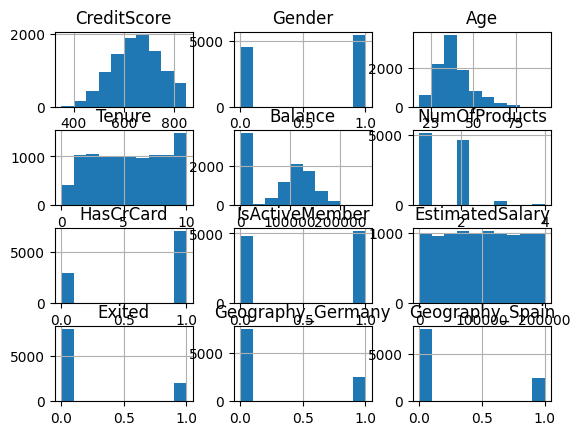

In [25]:
data.hist()
plt.show()

6. Train Test Split

In [26]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

7. Understanding Data Distribution

0    7963
1    2037
Name: Exited, dtype: int64


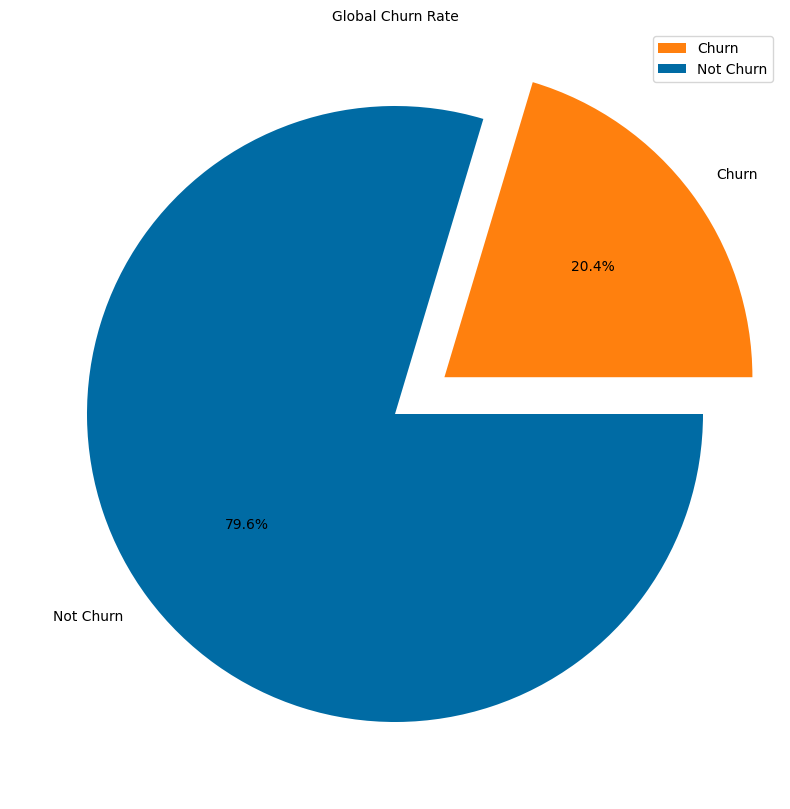

In [44]:
churn_count=data.Exited.value_counts()
print(churn_count)

y = np.array([churn_count[1], churn_count[0]])
plt.figure(figsize=(10, 10))
labels = ["Churn", "Not Churn"]
explode = [0.2, 0]
colors = ['#ff800e', '#006ba4']
textprops = {"fontsize":10}
plt.pie(y, labels = labels, explode = explode, colors = colors, textprops=textprops, autopct='%.1f%%')
plt.legend()
plt.title('Global Churn Rate',fontsize=10)
plt.show() 

8. Model Training

8.1 Logistic Regression

In [28]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
print(lr.score(X_test, y_test))

0.811


8.2 Random Forest 

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
print(rf.score(X_test, y_test))

0.863


8.3 Support Vector Machine

In [32]:
svm=SVC()
svm.fit(X_train, y_train)

SVC()

In [33]:
print(svm.score(X_test, y_test))

0.856


8.4 Gradient Boosting

In [37]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


c:\Users\lenovo\anaconda3\envs\tf\lib\site-packages\xgboost\core.py:158: UserWarning: [22:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [38]:
print(xgb.score(X_test, y_test))

0.864


9. Results


In [40]:
models = [lr, rf, svm, xgb]
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression
Confusion Matrix:
[[1543   64]
 [ 314   79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Random Forest
Confusion Matrix:
[[1543   64]
 [ 210  183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


SVM
Confusion Matrix:
[[1562   45]
 [ 243  150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92   

10. Actual vs Predicted

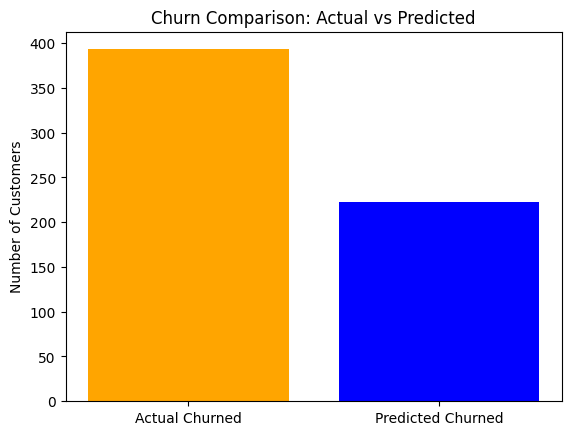

In [51]:


actual_churn_count = np.sum(y_test == 1)
predicted_churn_count = np.sum(y_pred == 1)

plt.bar(['Actual Churned', 'Predicted Churned'], [actual_churn_count, predicted_churn_count], color=['orange', 'blue'])
plt.title("Churn Comparison: Actual vs Predicted")
plt.ylabel("Number of Customers")
plt.show()


11. Hyperparameter Tuning

In [42]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score

best_model = grid.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", accuracy)


Test Accuracy with Best Parameters: 0.8615


In [45]:
print(data.columns)

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [47]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


12. Code to Predict Churn Status

In [ ]:

final = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
         'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
         'Geography_Germany', 'Geography_Spain']

user_features = dict.fromkeys(final, 0)

print("Enter customer details for churn prediction:\n")

user_features['CreditScore'] = float(input("Credit Score: "))
user_features['Age'] = float(input("Age: "))
user_features['Tenure'] = float(input("Tenure (years): "))
user_features['Balance'] = float(input("Balance: "))
user_features['NumOfProducts'] = int(input("Number of Products: "))
user_features['HasCrCard'] = int(input("Has Credit Card? (1 = Yes, 0 = No): "))
user_features['IsActiveMember'] = int(input("Is Active Member? (1 = Yes, 0 = No): "))
user_features['EstimatedSalary'] = float(input("Estimated Salary: "))

gender = input("Gender (Male/Female): ").strip().lower()
if gender == "male":
    user_features['Gender'] = 1
else:
    user_features['Gender'] = 0  

geo = input("Geography (France/Germany/Spain): ").strip().lower()
if geo == "germany":
    user_features['Geography_Germany'] = 1
elif geo == "spain":
    user_features['Geography_Spain'] = 1

user_df = pd.DataFrame([user_features])

user_scaled = scaler.transform(user_df)

prediction = best_model.predict(user_scaled)[0]

if prediction == 1:
    print("The customer is likely to CHURN.")
else:
    print("The customer is likely to STAY.")


Enter customer details for churn prediction:

The customer is likely to STAY.
